In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
def FNmodel(vec, I):
    def dvdt(vec, I):
        return c*(-vec[0]**3/3+vec[0]-vec[1]+I)

    def dwdt(vec):
        return (vec[0]-b*vec[1]+a)/tau

    def dvecdt(vec, I):
        return np.array([dvdt(vec, I), dwdt(vec)])
        
    k1=dvecdt(vec, I)
    k2=dvecdt(vec+dt*k1/2, I)
    k3=dvecdt(vec+dt*k2/2, I)
    k4=dvecdt(vec+dt*k3, I)
    return vec+(k1+2*k2+2*k3+k4)*dt/6

def resultshow(vec):
    for i in range(vec.shape[0]):
        plt.plot(np.arange(vec.shape[1])*dt, vec[i, :])
        
    plt.xlabel('time')
    plt.ylabel('value')
    plt.show()
    
a=0.7
b=0.8
c=10
tau=1
dt=0.001
T=30

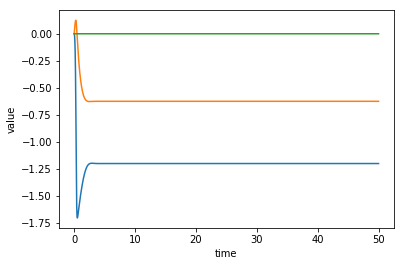

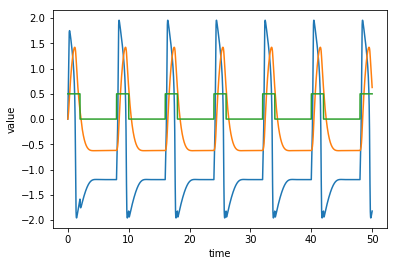

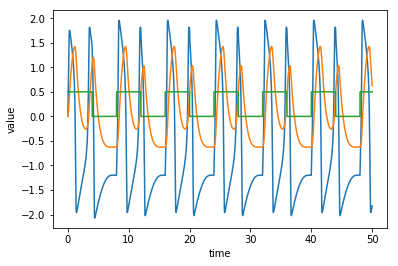

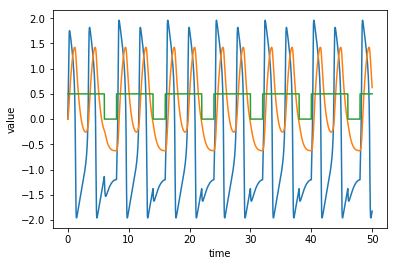

In [65]:
for k in range(4):
    #setting
    state=np.array([0, 0])

    #preparation
    state=state.reshape(2, 1)

    #simulation
    t=0
    Is=[]
    while t<T:
        if np.int(t)%8<2*k:
            I=0.5
        else:
            I=0

        Is.append(I)

        state=np.c_[state, FNmodel(state[:, -1].reshape(2), I).reshape(2, 1)]
        t+=dt

    Is.append(Is[-1])
    state=np.r_[state, np.array(Is).reshape(1, -1)]
    resultshow(state)

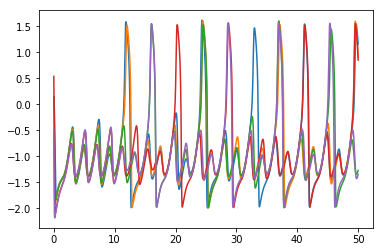

In [62]:
#setting
T=50
N=5
K=0.1
v=(np.random.rand(N)*3-1.5)
w=(np.random.rand(N))*2
network=np.array([
    [0, 1, 0, 0, 1],
    [1, 0, 1, 0, 0],
    [0, 1, 0, 1, 0],
    [0, 0, 1, 0, 1],
    [1, 0, 0, 0, 1]
])
for i in range(N):
    network[i, i]=0

#preparation
v=v.reshape(N, 1)
w=w.reshape(N, 1)
temp=np.zeros((2, N))

#simulation
t=0
while t<T:
    out=v[:, -1].copy()
    out[out<0]=0
    out[out>0]=1
    I=np.dot(network, out)/np.sum(network, axis=1)+(1+np.sin(3*t))
    for i in range(N):
        vec=np.array([v[i, -1], w[i, -1]])
        temp[:, i]=FNmodel(vec, K*I[i])
        
    v=np.c_[v, temp[0, :].reshape(N, 1)]
    w=np.c_[w, temp[1, :].reshape(N, 1)]
    t+=dt

for i in range(N):
    plt.plot(np.arange(v.shape[1])*dt, v[i])
    
plt.show()

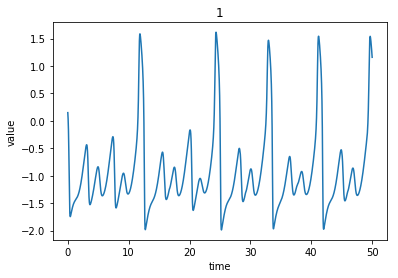

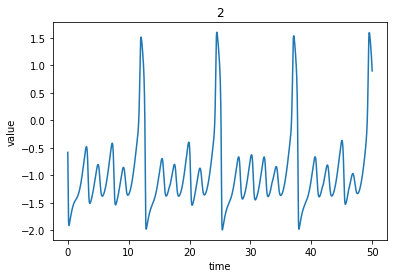

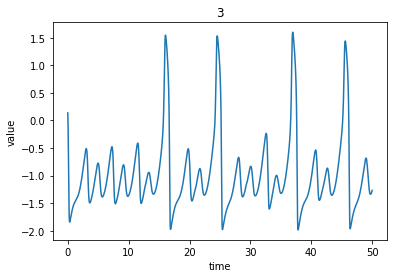

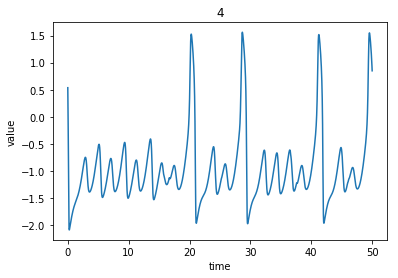

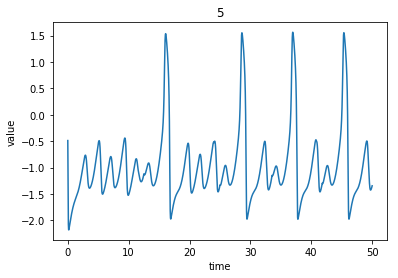

In [64]:
for i in range(5):
    plt.plot(np.arange(v.shape[1])*dt, v[i, :])
    plt.xlabel('time')
    plt.ylabel('value')
    plt.title(str(i+1))
    plt.show()